In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
import warnings
warnings.filterwarnings("ignore")

In [160]:
data = pd.read_csv(r"C:\Users\imins\Downloads\USArrests.csv")

In [161]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [162]:
data.shape

(50, 5)

In [163]:
df = data

In [164]:
df.rename(columns={"Unnamed: 0":"Places"},inplace=True)

In [165]:
df.head()

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [166]:
df.isna().sum()

Places      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

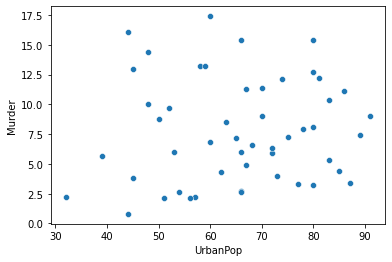

In [167]:
sns.scatterplot(x='UrbanPop',y='Murder',data = df )
plt.show()

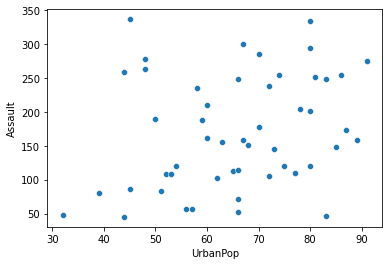

In [168]:
sns.scatterplot(x='UrbanPop',y='Assault',data = df )
plt.show()

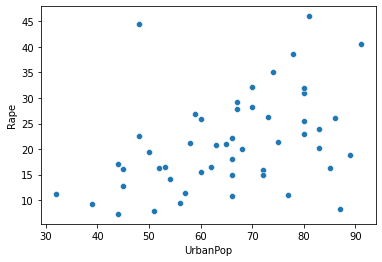

In [169]:
sns.scatterplot(x='UrbanPop',y='Rape',data = df )
plt.show()

In [170]:
df.columns

Index(['Places', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [171]:
x= df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

## Kmeans Clustering

In [172]:
from sklearn.cluster import KMeans

In [173]:
km = KMeans(n_clusters=4)

In [174]:
km.fit(x)

KMeans(n_clusters=4)

In [175]:
clusters = km.predict(x)

In [176]:
df['clusters'] = clusters

In [177]:
df

,Places,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [178]:
km.inertia_

34728.629357142854

In [179]:
all_wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss = km.inertia_
    all_wcss.append(wcss)

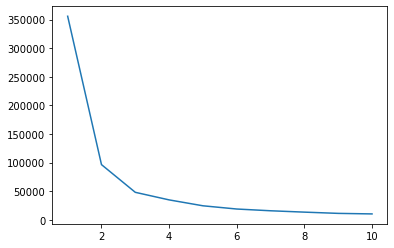

In [181]:
plt.plot(range(1,11), all_wcss)
plt.show()

In [183]:
km = KMeans(n_clusters=3)
km.fit(x)
clusters = km.predict(x)

In [184]:
df['clusters'] = clusters

In [185]:
df

,Places,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


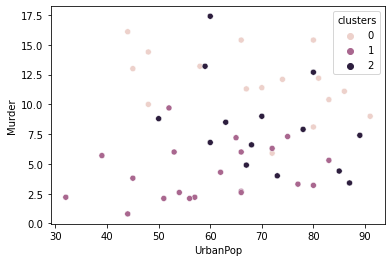

In [186]:
sns.scatterplot(x='UrbanPop',y='Murder',data = df, hue = 'clusters' )
plt.show()

## HC

In [188]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [190]:
mergings = linkage(x, method = "complete")

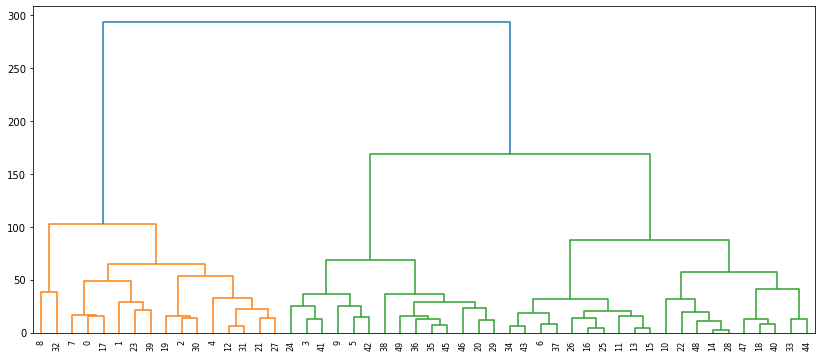

In [193]:
plt.figure(figsize=(14,6))
dendrogram(mergings)
plt.show()

In [201]:
labels = fcluster(mergings, 175, criterion='distance')

In [202]:
labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [203]:
df['hc_clusters'] = labels

In [204]:
df

,Places,Murder,Assault,UrbanPop,Rape,clusters,hc_clusters
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,2,2
6,Connecticut,3.3,110,77,11.1,1,2
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,2,2
